In [1]:
import pandas as pd
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

FIGSIZE = (16, 8)

In [2]:
data_path = 'cocktail.csv'
data_df = pd.read_csv(data_path, index_col= False)

In [3]:
data_df.head()

,Unnamed: 0,alcohol_by_volume
0,1,13.391085
1,2,51.616560
2,3,34.521952
3,4,20.453795
4,5,34.532339


In [4]:
data = data_df['alcohol_by_volume'].values 

In [5]:
K = 3  # Number of clusters found using mclust in R

In [6]:
with pm.Model() as model:
    # Priors for the mixture weights
    w = pm.Dirichlet('w', a=np.ones(K))
    
    # Priors for the means of the Gaussian distributions
    mu = pm.Normal('mu', mu=np.linspace(0, 100, K), sigma=15, shape=K)
    
    # Priors for the standard deviations
    sigma = pm.HalfNormal('sigma', sigma=10, shape=K)
    
    # Observed mixture
    y = pm.NormalMixture('y', w=w, mu=mu, sigma=sigma, observed=data)
    
    # Inference
    idata = pm.sample(tune=2, random_seed=0)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, mu, sigma]


Sampling 4 chains for 2 tune and 1_000 draw iterations (8 + 4_000 draws total) took 3 seconds.
/home/mrosinski/miniconda3/envs/intuitive_bayes/lib/python3.10/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: divide by zero encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 4000 divergences after tuning. Increase `target_accept` or reparameterize.


## NUTS Tuning
- Trials with different target accept criteria

In [7]:
with model:
    idata_10 = pm.sample(random_seed=3412, target_accept=0.1)
    idata_80 = pm.sample(random_seed=3412, target_accept=0.8)
    idata_99 = pm.sample(random_seed=3412, target_accept=0.99)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, mu, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 2000 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, mu, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, mu, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 121 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


/home/mrosinski/miniconda3/envs/intuitive_bayes/lib/python3.10/site-packages/arviz/utils.py:142: UserWarning: Items starting with ~: ['μ'] have not been found and will be ignored
  warnings.warn(
/home/mrosinski/miniconda3/envs/intuitive_bayes/lib/python3.10/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/home/mrosinski/miniconda3/envs/intuitive_bayes/lib/python3.10/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/home/mrosinski/miniconda3/envs/intuitive_bayes/lib/python3.10/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


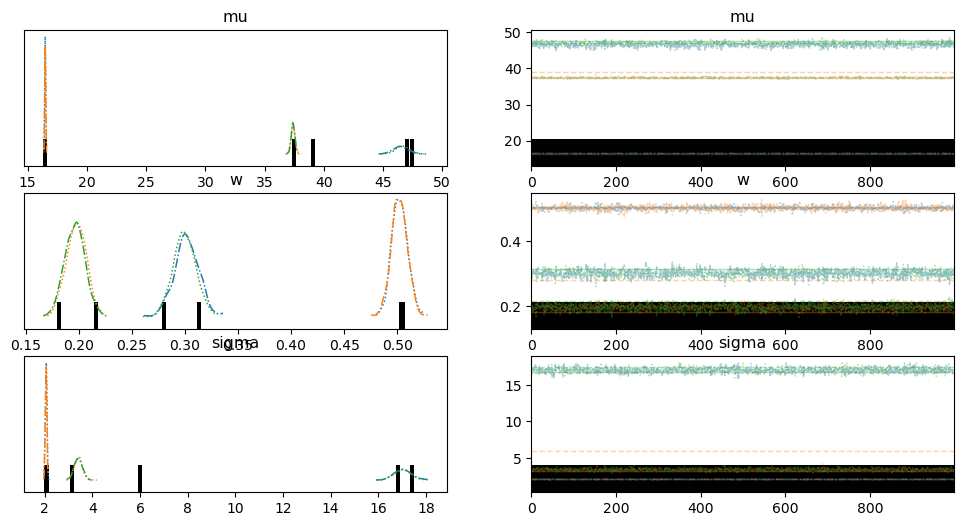

In [8]:
az.plot_trace(idata_10, var_names=["~μ"]);

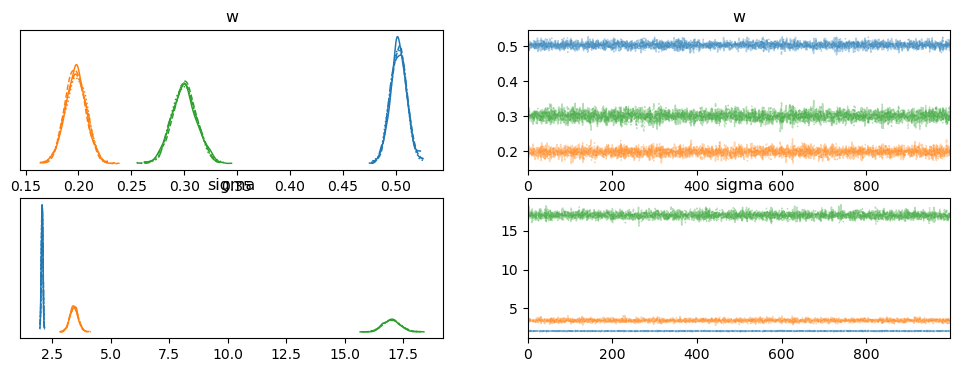

In [9]:
az.plot_trace(idata_80, var_names=["~mu"]);

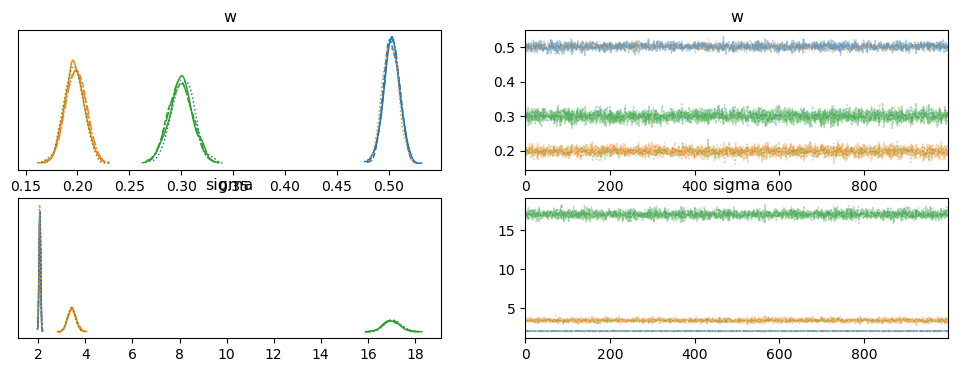

In [10]:
az.plot_trace(idata_99, var_names=["~mu"]);

In [11]:
idata_10.sample_stats.acceptance_rate.mean().item()

0.4423161457800198

In [12]:
idata_80.sample_stats.acceptance_rate.mean().item()

0.8025861501967799

In [13]:
idata_99.sample_stats.acceptance_rate.mean().item()

0.9891723639758506

## Summary statistics

In [14]:
az.summary(idata_10)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[0],23.982,12.990,16.367,46.930,6.467,4.951,6.0,31.0,3.26
mu[1],32.593,9.330,16.446,39.051,4.646,3.557,5.0,32.0,3.73
mu[2],44.631,4.193,37.246,47.451,2.083,1.594,5.0,29.0,2.79
w[0],0.453,0.088,0.290,0.512,0.044,0.033,6.0,29.0,3.24
w[1],0.290,0.128,0.181,0.508,0.064,0.049,5.0,4.0,3.50
w[2],0.256,0.051,0.186,0.314,0.025,0.019,5.0,29.0,2.47
sigma[0],5.810,6.475,1.991,17.275,3.223,2.468,6.0,33.0,2.80
sigma[1],3.661,1.443,2.038,5.994,0.718,0.550,4.0,28.0,6.70
sigma[2],13.665,5.927,3.200,17.401,2.950,2.259,5.0,31.0,3.14


In [15]:
az.summary(idata_80)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[0],16.477,0.043,16.395,16.558,0.001,0.000,4990.0,2785.0,1.0
mu[1],37.398,0.161,37.118,37.723,0.002,0.002,5177.0,2981.0,1.0
mu[2],46.660,0.619,45.489,47.823,0.009,0.007,4255.0,3347.0,1.0
w[0],0.503,0.008,0.487,0.517,0.000,0.000,5312.0,3487.0,1.0
w[1],0.197,0.010,0.179,0.216,0.000,0.000,3654.0,3267.0,1.0
w[2],0.300,0.012,0.278,0.322,0.000,0.000,4016.0,3355.0,1.0
sigma[0],2.063,0.034,2.000,2.128,0.000,0.000,4978.0,3248.0,1.0
sigma[1],3.427,0.175,3.091,3.757,0.003,0.002,3843.0,2969.0,1.0
sigma[2],17.014,0.360,16.331,17.668,0.005,0.004,4635.0,3139.0,1.0


In [16]:
az.summary(idata_99)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[0],23.974,12.989,16.360,46.885,6.467,4.951,7.0,37.0,1.53
mu[1],32.168,9.061,16.406,37.646,4.512,3.455,7.0,32.0,1.53
mu[2],44.371,4.054,37.152,47.622,2.003,1.532,7.0,30.0,1.53
w[0],0.453,0.087,0.292,0.518,0.043,0.033,7.0,29.0,1.53
w[1],0.274,0.132,0.181,0.510,0.065,0.050,7.0,30.0,1.53
w[2],0.274,0.046,0.186,0.320,0.022,0.017,7.0,30.0,1.53
sigma[0],5.813,6.496,1.969,17.291,3.234,2.476,7.0,30.0,1.53
sigma[1],3.088,0.613,1.996,3.693,0.297,0.226,7.0,34.0,1.53
sigma[2],13.615,5.903,3.138,17.578,2.936,2.247,7.0,29.0,1.53


In [17]:
# idata_80.sample_stats.tree_depth.max()

In [18]:
# az.plot_trace(idata_10, compact=False, figsize=(20, 20));
# az.plot_trace(idata_99, compact=False, figsize=(20, 20));

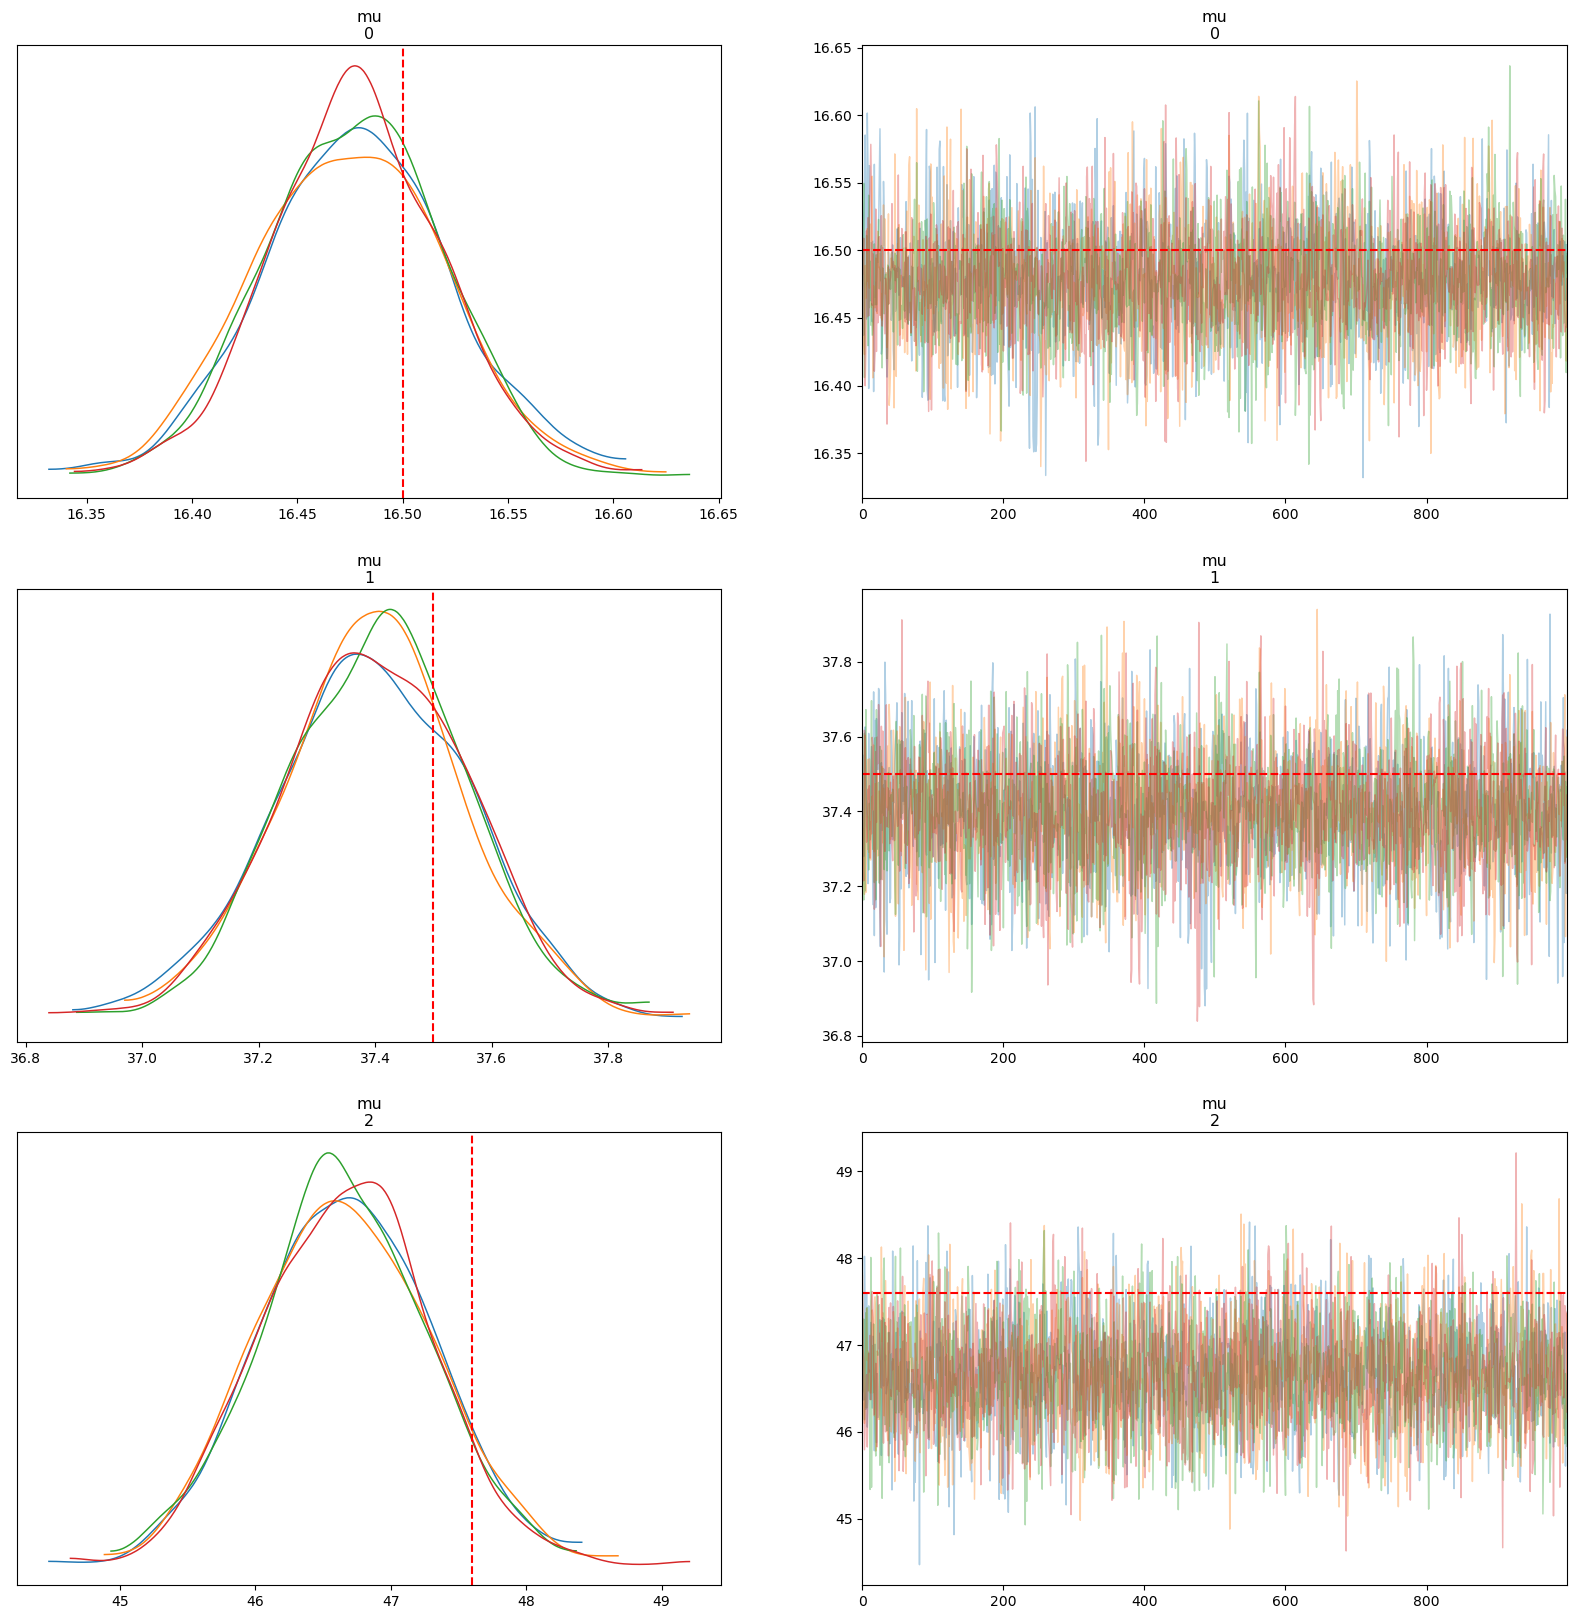

In [19]:
# az.plot_trace(idata_80, compact=False, var_names="mu", figsize=(20, 20));
axes = az.plot_trace(idata_80, compact=False, var_names="mu", figsize=(20, 20))

reference_values = [16.5, 37.5, 47.6] 

for i, val in enumerate(reference_values):
    axes[i, 0].axvline(val, color='r', linestyle='--')
    axes[i, 1].axhline(val, color='r', linestyle='--')

plt.show()

In [20]:
# az.plot_forest(idata_80,  figsize=(10,6), combined=False, var_names="mu");

In [21]:
# az.plot_rank(idata_80, var_names = "mu", figsize=(12, 6));

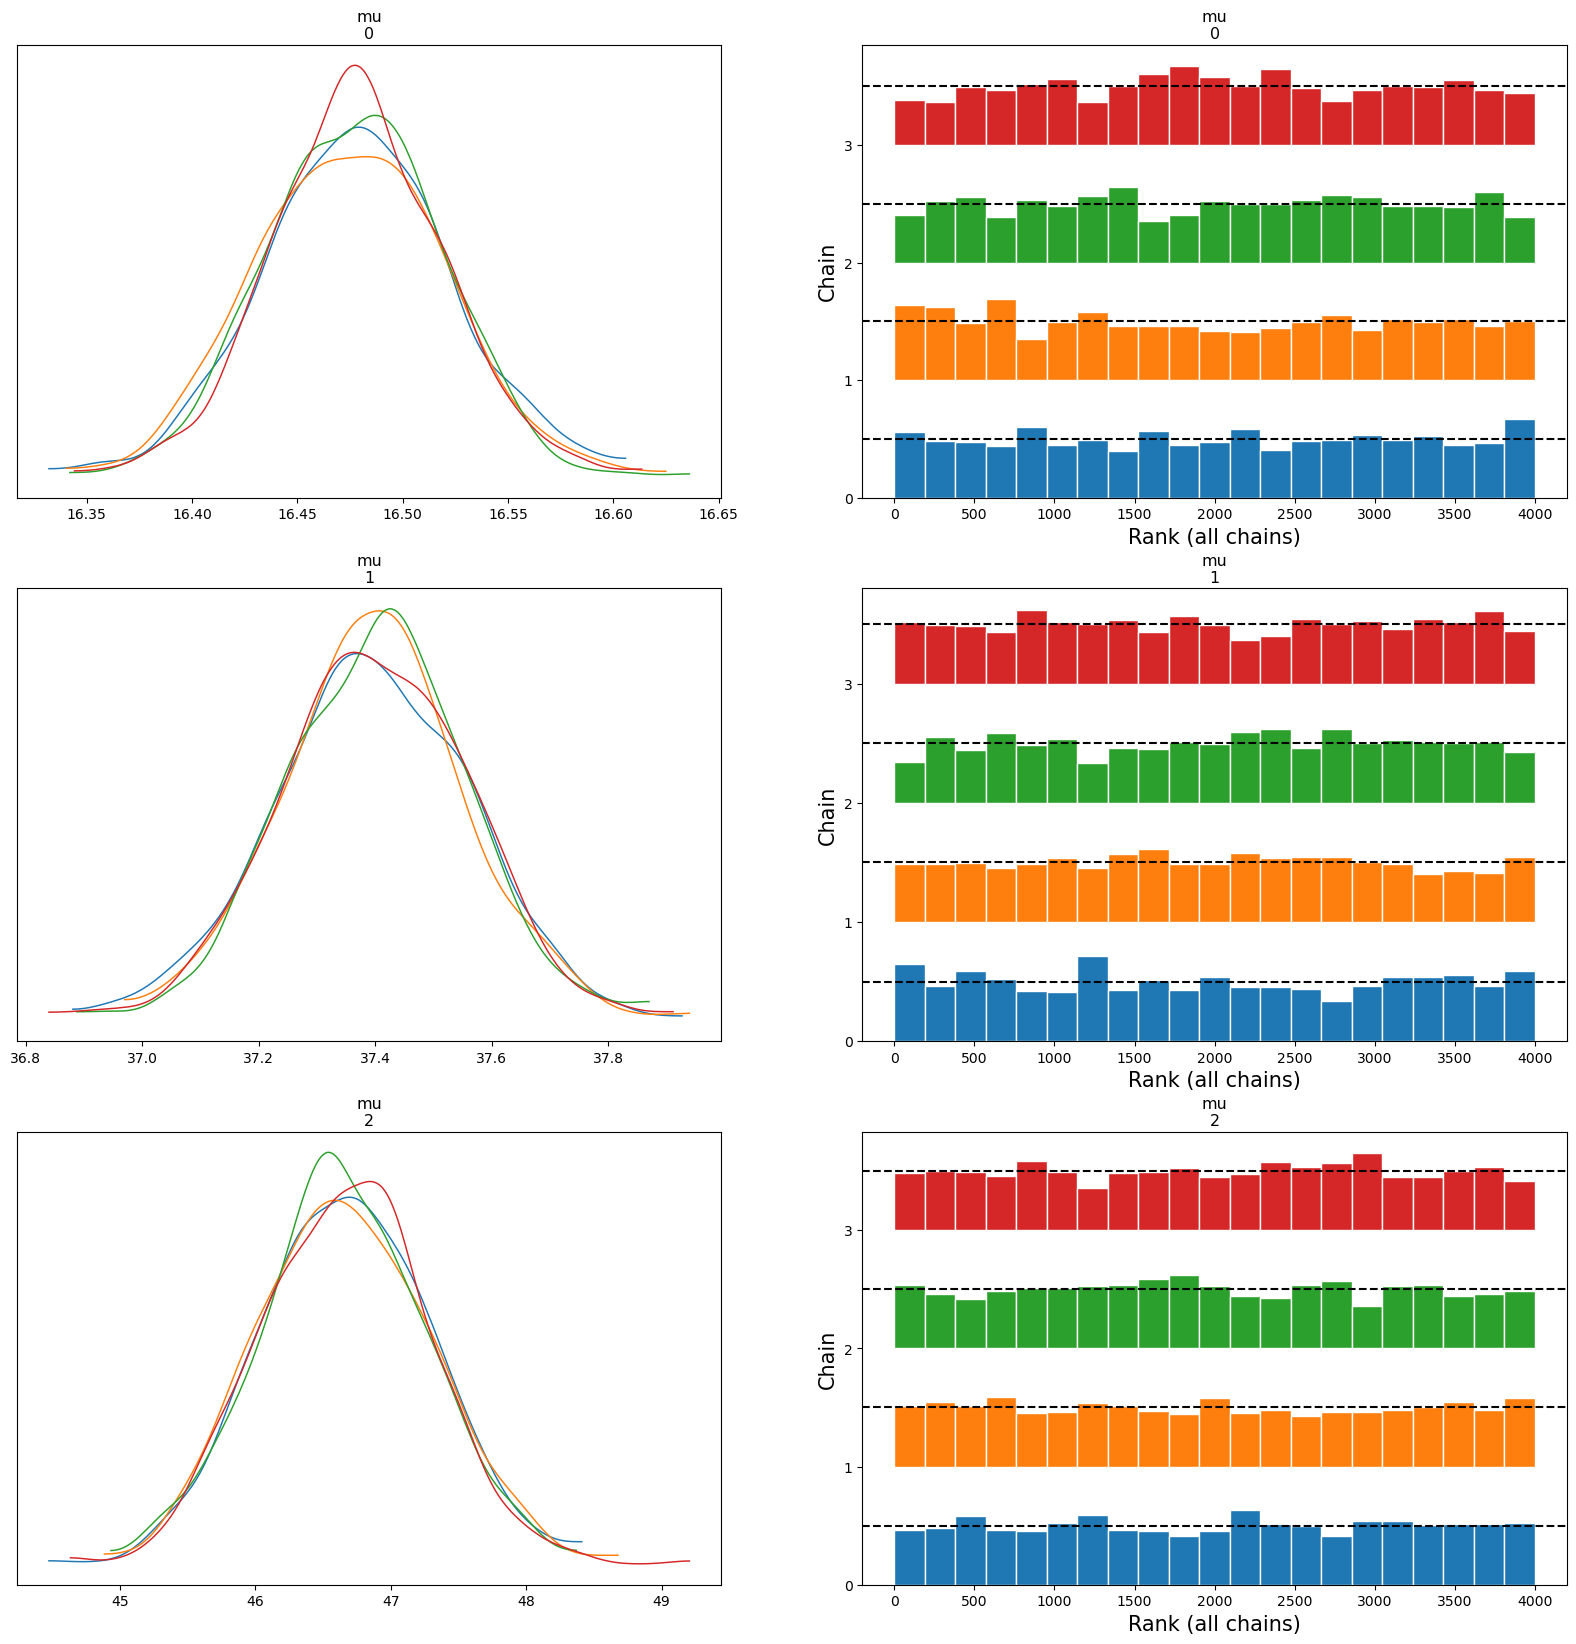

In [22]:
az.plot_trace(idata_80, kind="rank_bars", var_names="mu", compact=False, figsize=(20, 20));

In [23]:
# az.plot_autocorr(idata_80, var_names = "mu", figsize=FIGSIZE);

In [24]:
# _, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
# az.plot_ess(idata_80, kind="local", ax=axes[1])
# az.plot_ess(idata_80, kind="quantile", ax=axes[0]);

## ESS Evolution

/home/mrosinski/miniconda3/envs/intuitive_bayes/lib/python3.10/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
/home/mrosinski/miniconda3/envs/intuitive_bayes/lib/python3.10/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


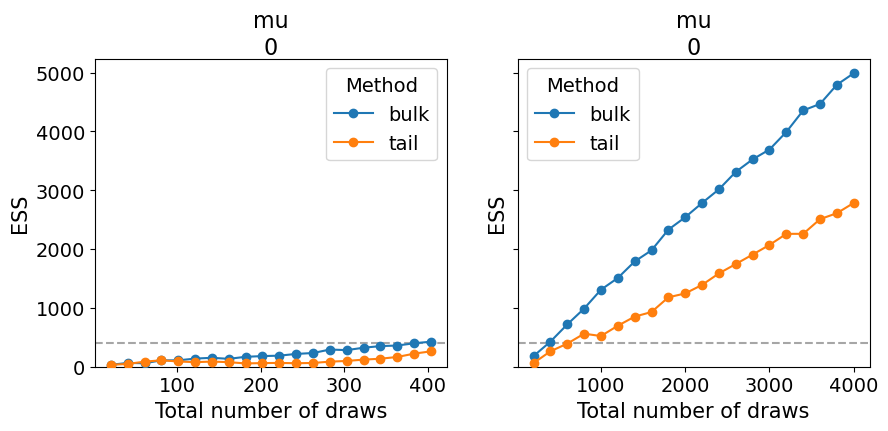

In [25]:
_, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
az.plot_ess(idata_80, kind="evolution", ax=axes[1])
az.plot_ess(idata_80.sel(draw=slice(0, 100)), kind="evolution", ax=axes[0]);

## Posterior geometry

/home/mrosinski/miniconda3/envs/intuitive_bayes/lib/python3.10/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


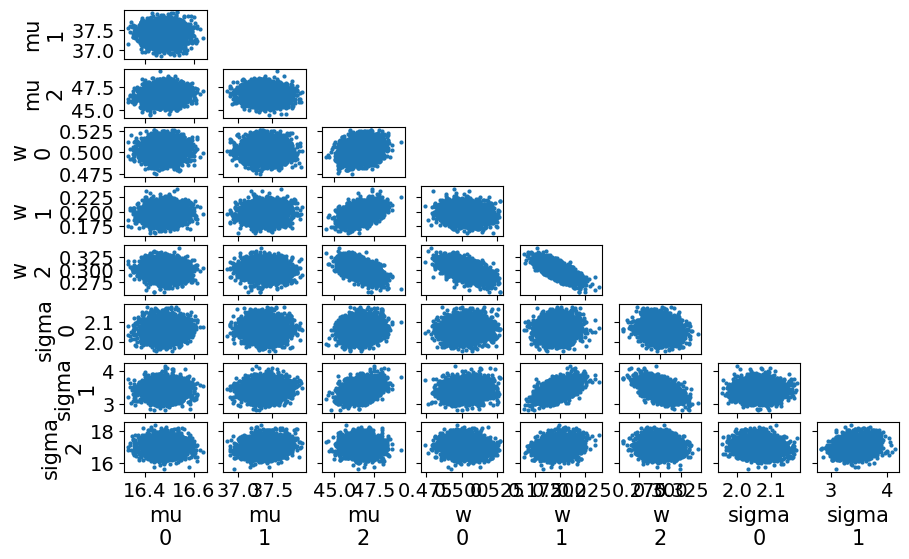

In [26]:
# No funnels or divergences :)
az.plot_pair(idata_80, divergences=True, figsize=(10, 6));

## Relative sigmas

In [28]:
print(f"{2.063 / 16.477 * 100:.1f}%")
print(f"{3.427/37.398 * 100:.1f}%")
print(f"{17.014 / 46.66 * 100:.1f}%")

12.5%
9.2%
36.5%


### Is the secret ingredient Gin??

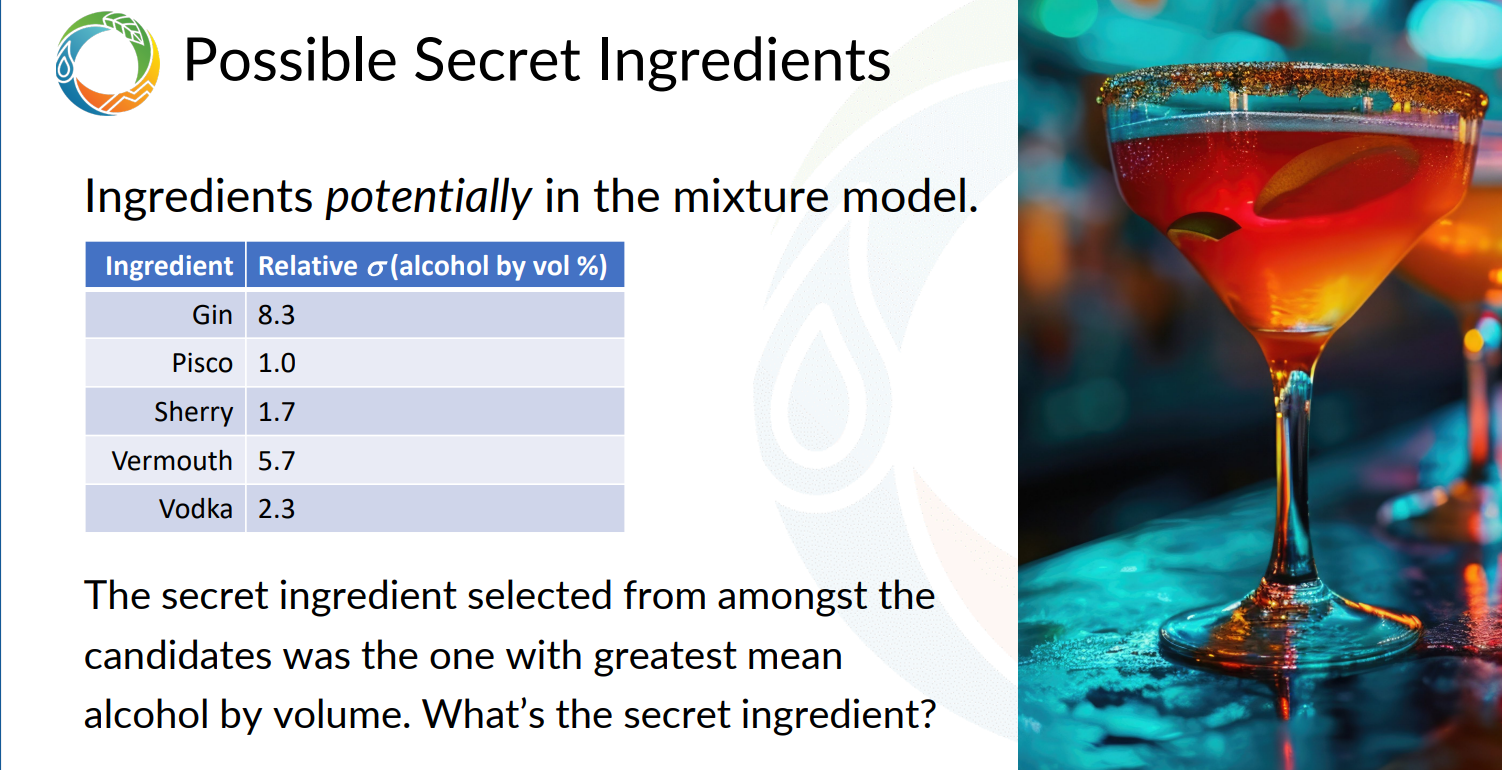